In [1]:
import numpy as np
import pandas as pd

import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sklearn.__version__

'0.24.1'

### Load the dataset

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# remove irrelevant variables
data = data.drop("Id", axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# create the test set
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          74 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBu

The dataset contains a mixture of categorical and numerical columns, `dtypes: float64(3), int64(34), object(43)`. There are continuous, nominal, and ordinal data types.
It also has missing data which indicates we need to apply transformation `ColumnTransformer` for different columns of data.  

For continuous columns, use `SimpleImputer` with `strategy='mean'` to handle missing values, then apply `StandardScaler` to normalize data.

For ordinal columns and norminal columns, use `SimpleImputer` with `strategy='most_frequent` to handle missing values, and use `OrdinalEncoder` and `OneHotEncoder` to convert categorical values to numerical values.

In [7]:
train_data.shape

(1168, 80)

### Explore the training set to gain insights

In [8]:
# compute the standard correlation coefficient
housing = train_data.copy()

corr_matrix = housing.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
GarageYrBlt      0.480351
MasVnrArea       0.459123
Fireplaces       0.457549
BsmtFinSF1       0.359460
LotFrontage      0.330066
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
PoolArea         0.115630
3SsnPorch        0.051532
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
LowQualFinSF    -0.011189
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
Name: SalePrice, dtype: float64

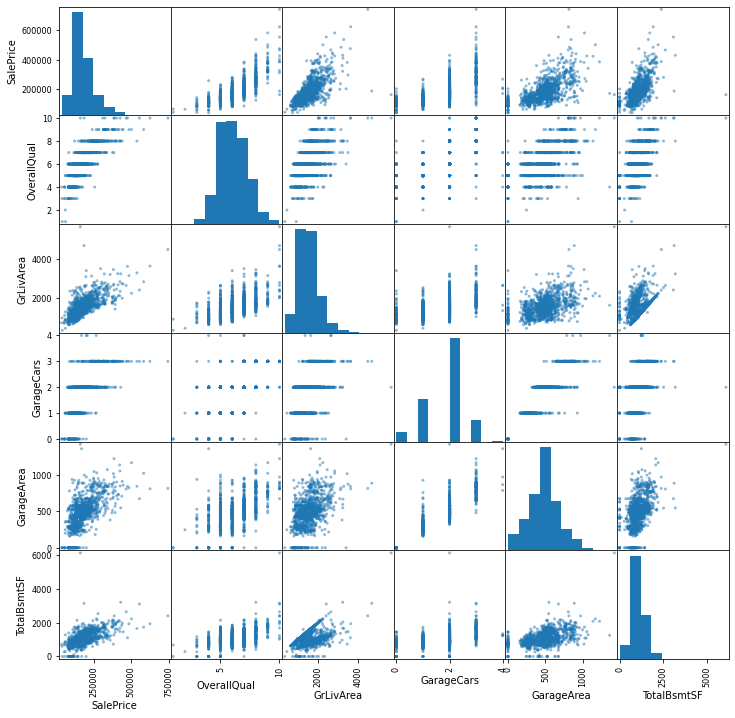

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice","OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF"]
scatter_matrix(housing[attributes], figsize=(12, 12));

- There is a positive correlation between the `SalePrice` and `OverallQual`, `GrLivArea`, `GarageCar` and  `GarageArea`.

### Select one machine learning model, train, optimise

In [10]:
# separate the predictors and the labels
X_train = train_data.drop("SalePrice", axis=1)
y_train = train_data["SalePrice"].copy()  # save the labels

In [11]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [12]:
y_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

In [13]:
X_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [14]:
X_train.shape

(1168, 79)

### Identify all ordinal_columns: all quality related

In [15]:
X_train['OverallQual'].value_counts()

6     311
5     308
7     258
8     135
4      88
9      36
3      16
10     13
1       2
2       1
Name: OverallQual, dtype: int64

In [16]:
X_train['ExterQual'].value_counts()

TA    727
Gd    388
Ex     42
Fa     11
Name: ExterQual, dtype: int64

In [17]:
X_train['BsmtFinType1'].value_counts()

Unf    345
GLQ    328
ALQ    178
BLQ    123
Rec    104
LwQ     62
Name: BsmtFinType1, dtype: int64

In [18]:
X_train['BsmtFinType2'].value_counts()

Unf    1009
Rec      46
LwQ      36
BLQ      22
ALQ      17
GLQ      10
Name: BsmtFinType2, dtype: int64

In [19]:
X_train['HeatingQC'].value_counts()

Ex    583
TA    347
Gd    195
Fa     42
Po      1
Name: HeatingQC, dtype: int64

In [20]:
X_train['LowQualFinSF'].value_counts()

0      1147
80        3
392       1
528       1
515       1
513       1
481       1
473       1
420       1
397       1
390       1
53        1
384       1
360       1
234       1
232       1
205       1
144       1
120       1
572       1
Name: LowQualFinSF, dtype: int64

In [21]:
X_train['KitchenQual'].value_counts()

TA    589
Gd    470
Ex     77
Fa     32
Name: KitchenQual, dtype: int64

In [22]:
X_train['FireplaceQu'].value_counts()

Gd    305
TA    252
Fa     27
Ex     21
Po     16
Name: FireplaceQu, dtype: int64

In [23]:
X_train['PoolQC'].value_counts()

Fa    2
Gd    2
Ex    2
Name: PoolQC, dtype: int64

In [24]:
X_train['Fence'].value_counts()

MnPrv    128
GdPrv     50
GdWo      46
MnWw       9
Name: Fence, dtype: int64

In [25]:
X_train['GarageQual'].value_counts()

TA    1050
Fa      36
Gd      13
Ex       3
Po       2
Name: GarageQual, dtype: int64

In [26]:
# pass categories in the expected ordering explicitly to the categories constructor.



In [27]:
def getOrdinalPip(order):
    return Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                             ('encoder', OrdinalEncoder(categories=order,
                                                        handle_unknown='use_encoded_value', # New in version 0.24
                                                        unknown_value=-1,)),
                             ('scaler', StandardScaler())])

In [28]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# a function for getting all categorical_columns
def get_categorical_columns(df):
    categorical_columns_selector = selector(dtype_include=object)
    categorical_columns = categorical_columns_selector(df)
    return categorical_columns

In [29]:
# a function for getting all numerical_columns
def get_numerical_columns(df):
    numerical_columns_selector = selector(dtype_exclude=object)
    numerical_columns = numerical_columns_selector(df)
    return numerical_columns

In [30]:
get_numerical_columns(X_train)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [31]:
ordinal_columns1 = ['HeatingQC', 'GarageQual','FireplaceQu']
ordinal_columns1

['HeatingQC', 'GarageQual', 'FireplaceQu']

In [66]:
def get_ordinal_pipeline(order):
    return Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                             ('encoder', OrdinalEncoder(categories=order,
                                                        handle_unknown='use_encoded_value', # New in version 0.24
                                                        unknown_value=-1,)),
                             ('scaler', StandardScaler())])
    

In [32]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# a function for Transformation the data
def my_transformation(df):
    df = df.copy()
    
    numerical_columns = get_numerical_columns(df)
    nominal_columns = get_categorical_columns(df)
    ordinal_columns = ['GarageQual']
    ordinal_columns1 = ['FireplaceQu']
    ordinal_columns2 = ['HeatingQC']
    order1 = [['Po', 'Fa', 'TA', 'Gd', 'Ex']]
  
    ordinal_columns3 = ['KitchenQual']
    ordinal_columns4 = ['ExterQual']
    order2 = [['Fa', 'TA', 'Gd', 'Ex']]
    
    numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler())])
    nominal_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                             ('encoder', OneHotEncoder(handle_unknown='ignore'))])
    ordinal_pipeline1 = get_ordinal_pipeline(order1)
    ordinal_pipeline1 = get_ordinal_pipeline(order2)


    preprocessor = ColumnTransformer([
        ('numerical_transformer', numerical_pipeline, numerical_columns),
        ('nominal_transformer', nominal_pipeline, nominal_columns),
        ('ordinal_transformer', ordinal_pipeline1, ordinal_columns),
        ('ordinal_transformer1', ordinal_pipeline1, ordinal_columns1),
        ('ordinal_transformer2', ordinal_pipeline1, ordinal_columns2),
        ('ordinal_transformer3', ordinal_pipeline2, ordinal_columns3),
    ])
    
    preprocessor.fit(df)
    
    return preprocessor

In [33]:
preprocessor= my_transformation(X_train)
X_train_prepared = preprocessor.transform(X_train)
X_train_prepared.shape

(1168, 289)

In [34]:
from sklearn.model_selection import GridSearchCV

# a function for tuning the model with hyper-parameter
def tune_model(model, param_grid, X_train_prepared):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train_prepared, y_train);
    print('grid_search.best_estimator_: ', grid_search.best_estimator_)
    final_model = grid_search.best_estimator_
    return final_model

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def showPerformance(clf):
    y_train_pred = clf.predict(X_train_prepared)
    
    print("RMSE train: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    scores = cross_val_score(lin_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=3)
    lin_rmse_scores = np.sqrt(-scores)
    print("Validation score RMSE Mean:", lin_rmse_scores.mean(), "; Standard deviation:", lin_rmse_scores.std())
    print("Training set score: {:.2f}".format(clf.score(X_train_prepared, y_train)))

#### Train a Linear Regression model

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train);
showPerformance(lin_reg)

RMSE train:  19509.295241934327
Validation score RMSE Mean: 38465.90938966306 ; Standard deviation: 7640.628002806967
Training set score: 0.94


#### Use RidgeCV

In [37]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], cv=5).fit(X_train_prepared, y_train)

print("alpha = ", ridge.alpha_)
showPerformance(ridge)

alpha =  10.0
RMSE train:  24334.206978876085
Validation score RMSE Mean: 38465.90938966306 ; Standard deviation: 7640.628002806967
Training set score: 0.90


#### Use LassoCV

In [38]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], max_iter=10000, cv=5).fit(X_train_prepared, y_train)

In [39]:
print("alpha = ", lasso.alpha_)
print("Number of features used:", np.sum(lasso.coef_ != 0))
showPerformance(lasso)

alpha =  10.0
Number of features used: 226
RMSE train:  19736.075468484163
Validation score RMSE Mean: 38465.90938966306 ; Standard deviation: 7640.628002806967
Training set score: 0.93


#### Use ElasticNet

In [40]:
from sklearn.linear_model import ElasticNet
elastic =  ElasticNet(max_iter=1e7)
elastic.fit(X_train_prepared, y_train)

showPerformance(elastic)

RMSE train:  32279.53224436162
Validation score RMSE Mean: 38465.90938966306 ; Standard deviation: 7640.628002806967
Training set score: 0.83


In [41]:
param_grid = {
            'alpha'     : [0.1, 1, 10, 0.01],
            'l1_ratio'  :  np.arange(0.40,1.00,0.10),
            'tol'       : [0.0001,0.001]
            }

final_model_elastic = tune_model(elastic, param_grid, X_train_prepared)


grid_search.best_estimator_:  ElasticNet(alpha=0.1, l1_ratio=0.8999999999999999, max_iter=10000000.0)


In [42]:
showPerformance(final_model_elastic)

RMSE train:  24523.13914357649
Validation score RMSE Mean: 38465.90938966306 ; Standard deviation: 7640.628002806967
Training set score: 0.90


#### Use VotingRegressor

In [43]:
from sklearn.ensemble import VotingRegressor

er = VotingRegressor([('ridge', ridge), ('lasso', lasso)], weights=[1,2])
er.fit(X_train_prepared, y_train)

showPerformance(er)

RMSE train:  20464.95752271724
Validation score RMSE Mean: 38465.90938966306 ; Standard deviation: 7640.628002806967
Training set score: 0.93


### Test model performance on test data

In [44]:
X_test = test_data.drop("SalePrice", axis=1)
y_test = test_data["SalePrice"].copy()
X_test.shape

(292, 79)

In [45]:
X_test_prepared = preprocessor.transform(X_test) 
X_test_prepared.shape

(292, 289)

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error # New in version 0.24
# show the model permormance on test data
def perfor_test(model):
    y_test_predicted = model.predict(X_test_prepared)
    print(f"Mean absolute error (MAE): " f"{mean_absolute_error(y_test, y_test_predicted):.4f} $")
    print(f"Median absolute error (MedAE): " f"{median_absolute_error(y_test, y_test_predicted):.4f} $")
    print(f"Mean absolute percentage error (MAPE): " f"{mean_absolute_percentage_error(y_test, y_test_predicted) * 100:.4f} %")

In [47]:
perfor_test(lasso)

Mean absolute error (MAE): 17546.2918 $
Median absolute error (MedAE): 11662.0175 $
Mean absolute percentage error (MAPE): 10.7322 %


In [48]:
import seaborn as sns
# plot the regression
def plot_reg(model):
    y_test_predicted = model.predict(X_test_prepared)
    predicted_actual = {"True values ($)": y_test, "Predicted values ($)": y_test_predicted}
    predicted_actual = pd.DataFrame(predicted_actual)
    
    sns.scatterplot(data=predicted_actual,
                     x="True values ($)", y="Predicted values ($)",
                     color="black", alpha=0.5)
    plt.axline((0, 0), slope=1, label="Perfect fit")
    plt.axis('square')
    plt.title("Regression using a model without \ntarget transformation");

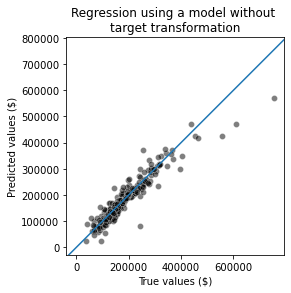

In [58]:
plot_reg(lin_reg)

- The model tends to under-estimate the price of the house.

#### Apply a target transformation

In [50]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

def target_transform(model):
    quantile_transformer = QuantileTransformer(n_quantiles=900, output_distribution="normal")
    model_transformed_target = TransformedTargetRegressor(regressor=model,
                                transformer=quantile_transformer)

    model_transformed_target.fit(X_train_prepared, y_train)
    return model_transformed_target

In [59]:
perfor_test(target_transform(lin_reg))

Mean absolute error (MAE): 15299.1114 $
Median absolute error (MedAE): 9060.2955 $
Mean absolute percentage error (MAPE): 9.0545 %


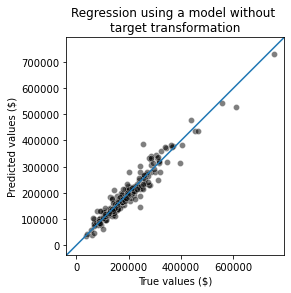

In [61]:
plot_reg(target_transform(lin_reg))

### Output predictions

In [62]:
test = pd.read_csv('test.csv')
ID = test["Id"]
test = test.drop("Id", axis=1)
test.shape

(1459, 79)

In [63]:
ID.shape

(1459,)

In [64]:
test_prepared = preprocessor.transform(test) 
test_prepared.shape

(1459, 289)

In [65]:
prediction = target_transform(lasso).predict(test_prepared)
prediction = pd.DataFrame(data={"Id":ID,"SalePrice":prediction}).to_csv('prediction.csv', index= False)

In [57]:
res = pd.read_csv('prediction.csv')
res.head()

,Id,SalePrice
0,1461,120365.542434
1,1462,148000.000000
2,1463,175060.592584
3,1464,190557.598049
4,1465,190000.000000
